In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


Using TensorFlow backend.


In [2]:
from keras.utils import np_utils
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [9]:
# import read_yale
# 
# images, resolution = read_yale.get_croppedyale_as_df()
# 
# # The data frame uses a MultiIndex to store the person 'names' and lighting
# # conditions. Here we briefly demonstrate using the data frame.
# 
# # Get the names of the persons
# row_persons = images.index.get_level_values('person')

In [3]:
import read_yale
from sklearn.model_selection import train_test_split
images, resolution = read_yale.get_croppedyale_as_df()
print (images.shape)
X = np.array(images)
y = images.index.get_level_values('person')
data=array(y.values)
label_encoder=LabelEncoder()
integer_encoded=label_encoder.fit_transform(data)

onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
y = onehot_encoder.fit_transform(integer_encoded)
#y=to_categorical(data)

#y = np_utils.to_categorical(y)
z = images.index.get_level_values('pic_name')
train, test = train_test_split(range(len(X)), test_size=0.2)


(2166, 32256)


In [5]:
target=y[train]
feature=X[train] ##This is a 1D numpy array of all the images, however, we will need images of 168*192. 

print (target)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  1.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(feature,target,test_size=0.2)

In [6]:
# X_train = np.expand_dims(X[train], -1)
# X_test=np.expand_dims(X[test],-1)
# y_train=np.expand_dims(y[train],-1)
# y_test=np.expand_dims(y[test],-1)

In [8]:
print(y_train.shape)

(1385, 38)


In [9]:
X_train = X_train.reshape(X_train.shape[0], 168, 192, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 168, 192, 1).astype('float32')
print (X_train.shape)

(1385, 168, 192, 1)


In [11]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(168, 192, 1
)))#()
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.5))

    model.add(Conv2D(36, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    #model.add(Dropout(0.5))

    model.add(Dense(38, activation='softmax'))
    
    return model

In [12]:
model1=createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 164, 188, 16)      416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 82, 94, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 92, 36)        5220      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 40, 46, 36)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 46, 36)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 66240)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               33915392  
__________

In [13]:
print (X_train.shape)


(1385, 168, 192, 1)


In [14]:
model1 = createModel()
batch_size = 256
epochs = 50
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#model1.summary()

history = model1.fit(X_train, y_train, batch_size=batch_size, validation_split=0.2,epochs=epochs, verbose=1)
#model1.evaluate(test_data, test_labels_one_hot)
model1.evaluate(X_test,y_test,batch_size)

Train on 1108 samples, validate on 277 samples
Epoch 1/50


 256/1108 [=====>........................] - ETA: 10:25 - loss: 3.6658 - acc: 0.0234

 512/1108 [============>.................] - ETA: 3:56 - loss: 8.3829 - acc: 0.0234 

 768/1108 [===================>..........] - ETA: 1:35 - loss: 8.3332 - acc: 0.0260

1024/1108 [==========================>...] - ETA: 18s - loss: 7.2334 - acc: 0.0225 

1108/1108 [==============================] - 239s 216ms/step - loss: 6.9663 - acc: 0.0226 - val_loss: 3.7295 - val_acc: 0.0253


Epoch 2/50


 256/1108 [=====>........................] - ETA: 38s - loss: 3.6148 - acc: 0.0742

 512/1108 [============>.................] - ETA: 26s - loss: 3.6289 - acc: 0.0703

 768/1108 [===================>..........] - ETA: 14s - loss: 3.6060 - acc: 0.0651

1024/1108 [==========================>...] - ETA: 3s - loss: 3.6081 - acc: 0.0732 

1108/1108 [==============================] - 53s 48ms/step - loss: 3.6014 - acc: 0.0767 - val_loss: 3.5912 - val_acc: 0.0686


Epoch 3/50


 256/1108 [=====>........................] - ETA: 41s - loss: 3.4868 - acc: 0.0820

 512/1108 [============>.................] - ETA: 27s - loss: 3.4534 - acc: 0.1426

 768/1108 [===================>..........] - ETA: 15s - loss: 3.4159 - acc: 0.1393

1024/1108 [==========================>...] - ETA: 3s - loss: 3.4026 - acc: 0.1445 

1108/1108 [==============================] - 53s 48ms/step - loss: 3.3988 - acc: 0.1453 - val_loss: 3.4626 - val_acc: 0.0758


Epoch 4/50


 256/1108 [=====>........................] - ETA: 37s - loss: 3.1937 - acc: 0.1680

 512/1108 [============>.................] - ETA: 25s - loss: 3.1135 - acc: 0.2500

 768/1108 [===================>..........] - ETA: 14s - loss: 3.0733 - acc: 0.2253

1024/1108 [==========================>...] - ETA: 3s - loss: 3.0983 - acc: 0.2188 

1108/1108 [==============================] - 52s 47ms/step - loss: 3.0934 - acc: 0.2374 - val_loss: 3.0189 - val_acc: 0.2888


Epoch 5/50


 256/1108 [=====>........................] - ETA: 36s - loss: 2.7271 - acc: 0.4062

 512/1108 [============>.................] - ETA: 25s - loss: 2.6687 - acc: 0.4082

 768/1108 [===================>..........] - ETA: 14s - loss: 2.6351 - acc: 0.4466

1024/1108 [==========================>...] - ETA: 3s - loss: 2.6598 - acc: 0.4111 

1108/1108 [==============================] - 52s 47ms/step - loss: 2.6738 - acc: 0.4134 - val_loss: 2.8746 - val_acc: 0.3285


Epoch 6/50


 256/1108 [=====>........................] - ETA: 36s - loss: 2.3066 - acc: 0.5469

 512/1108 [============>.................] - ETA: 25s - loss: 2.2151 - acc: 0.5625

 768/1108 [===================>..........] - ETA: 14s - loss: 2.1238 - acc: 0.5859

1024/1108 [==========================>...] - ETA: 3s - loss: 2.1300 - acc: 0.5742 

1108/1108 [==============================] - 51s 46ms/step - loss: 2.1580 - acc: 0.5614 - val_loss: 2.8044 - val_acc: 0.2924


Epoch 7/50


 256/1108 [=====>........................] - ETA: 37s - loss: 2.1385 - acc: 0.4609

 512/1108 [============>.................] - ETA: 28s - loss: 2.0735 - acc: 0.4844

 768/1108 [===================>..........] - ETA: 16s - loss: 2.0067 - acc: 0.5417

1024/1108 [==========================>...] - ETA: 3s - loss: 1.8867 - acc: 0.5654 

1108/1108 [==============================] - 56s 50ms/step - loss: 1.8847 - acc: 0.5668 - val_loss: 2.3173 - val_acc: 0.4765


Epoch 8/50


 256/1108 [=====>........................] - ETA: 36s - loss: 1.7804 - acc: 0.6523

 512/1108 [============>.................] - ETA: 25s - loss: 1.5584 - acc: 0.6875

 768/1108 [===================>..........] - ETA: 14s - loss: 1.4676 - acc: 0.7214

1024/1108 [==========================>...] - ETA: 3s - loss: 1.3779 - acc: 0.7402 

1108/1108 [==============================] - 52s 47ms/step - loss: 1.3830 - acc: 0.7374 - val_loss: 2.1857 - val_acc: 0.4657


Epoch 9/50


 256/1108 [=====>........................] - ETA: 36s - loss: 1.2354 - acc: 0.7266

 512/1108 [============>.................] - ETA: 25s - loss: 1.2590 - acc: 0.7344

 768/1108 [===================>..........] - ETA: 14s - loss: 1.1820 - acc: 0.7721

1024/1108 [==========================>...] - ETA: 3s - loss: 1.0928 - acc: 0.7891 

1108/1108 [==============================] - 52s 47ms/step - loss: 1.0845 - acc: 0.7888 - val_loss: 2.8621 - val_acc: 0.3177


Epoch 10/50


 256/1108 [=====>........................] - ETA: 36s - loss: 2.0547 - acc: 0.4492

 512/1108 [============>.................] - ETA: 25s - loss: 1.8344 - acc: 0.6191

 768/1108 [===================>..........] - ETA: 14s - loss: 1.5430 - acc: 0.7083

1024/1108 [==========================>...] - ETA: 3s - loss: 1.4285 - acc: 0.7500 

1108/1108 [==============================] - 53s 48ms/step - loss: 1.3749 - acc: 0.7626 - val_loss: 1.2993 - val_acc: 0.7148


Epoch 11/50


 256/1108 [=====>........................] - ETA: 38s - loss: 0.8148 - acc: 0.8984

 512/1108 [============>.................] - ETA: 26s - loss: 0.7131 - acc: 0.9277

 768/1108 [===================>..........] - ETA: 15s - loss: 0.6233 - acc: 0.9362

1024/1108 [==========================>...] - ETA: 3s - loss: 0.5708 - acc: 0.9385 

1108/1108 [==============================] - 53s 48ms/step - loss: 0.5687 - acc: 0.9359 - val_loss: 2.3805 - val_acc: 0.3755


Epoch 12/50


 256/1108 [=====>........................] - ETA: 36s - loss: 1.5767 - acc: 0.5312

 512/1108 [============>.................] - ETA: 25s - loss: 1.8143 - acc: 0.5566

 768/1108 [===================>..........] - ETA: 14s - loss: 1.6006 - acc: 0.6654

1024/1108 [==========================>...] - ETA: 3s - loss: 1.3734 - acc: 0.7393 

1108/1108 [==============================] - 53s 48ms/step - loss: 1.3104 - acc: 0.7563 - val_loss: 1.0223 - val_acc: 0.8231


Epoch 13/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.4361 - acc: 0.9688

 512/1108 [============>.................] - ETA: 28s - loss: 0.5370 - acc: 0.9590

 768/1108 [===================>..........] - ETA: 16s - loss: 0.5039 - acc: 0.9583

1024/1108 [==========================>...] - ETA: 3s - loss: 0.4945 - acc: 0.9443 

1108/1108 [==============================] - 59s 53ms/step - loss: 0.4777 - acc: 0.9468 - val_loss: 0.9605 - val_acc: 0.7617


Epoch 14/50


 256/1108 [=====>........................] - ETA: 41s - loss: 0.3505 - acc: 0.9297

 512/1108 [============>.................] - ETA: 28s - loss: 0.3445 - acc: 0.9395

 768/1108 [===================>..........] - ETA: 16s - loss: 0.3610 - acc: 0.9193

1024/1108 [==========================>...] - ETA: 3s - loss: 0.4547 - acc: 0.9102 

1108/1108 [==============================] - 56s 51ms/step - loss: 0.4403 - acc: 0.9134 - val_loss: 0.9594 - val_acc: 0.7942


Epoch 15/50


 256/1108 [=====>........................] - ETA: 36s - loss: 0.4045 - acc: 0.9297

 512/1108 [============>.................] - ETA: 26s - loss: 0.4120 - acc: 0.9238

 768/1108 [===================>..........] - ETA: 15s - loss: 0.3655 - acc: 0.9336

1024/1108 [==========================>...] - ETA: 3s - loss: 0.3078 - acc: 0.9482 

1108/1108 [==============================] - 53s 48ms/step - loss: 0.2986 - acc: 0.9504 - val_loss: 0.6446 - val_acc: 0.8375


Epoch 16/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.1214 - acc: 0.9766

 512/1108 [============>.................] - ETA: 28s - loss: 0.1190 - acc: 0.9844

 768/1108 [===================>..........] - ETA: 16s - loss: 0.1027 - acc: 0.9896

1024/1108 [==========================>...] - ETA: 4s - loss: 0.0979 - acc: 0.9912 

1108/1108 [==============================] - 62s 56ms/step - loss: 0.0943 - acc: 0.9919 - val_loss: 0.5120 - val_acc: 0.8700


Epoch 17/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.0657 - acc: 1.0000

 512/1108 [============>.................] - ETA: 28s - loss: 0.0943 - acc: 0.9883

 768/1108 [===================>..........] - ETA: 17s - loss: 0.1772 - acc: 0.9622

1024/1108 [==========================>...] - ETA: 4s - loss: 0.3152 - acc: 0.9375 

1108/1108 [==============================] - 65s 58ms/step - loss: 0.3539 - acc: 0.9314 - val_loss: 1.6532 - val_acc: 0.6245


Epoch 18/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.7381 - acc: 0.8203

 512/1108 [============>.................] - ETA: 28s - loss: 0.6022 - acc: 0.8809

 768/1108 [===================>..........] - ETA: 17s - loss: 0.5001 - acc: 0.9102

1024/1108 [==========================>...] - ETA: 4s - loss: 0.4221 - acc: 0.9277 

1108/1108 [==============================] - 59s 53ms/step - loss: 0.3953 - acc: 0.9332 - val_loss: 0.6416 - val_acc: 0.8664


Epoch 19/50


 256/1108 [=====>........................] - ETA: 42s - loss: 0.1018 - acc: 0.9922

 512/1108 [============>.................] - ETA: 29s - loss: 0.0757 - acc: 0.9961

 768/1108 [===================>..........] - ETA: 17s - loss: 0.0642 - acc: 0.9974

1024/1108 [==========================>...] - ETA: 4s - loss: 0.0685 - acc: 0.9951 

1108/1108 [==============================] - 65s 58ms/step - loss: 0.0681 - acc: 0.9955 - val_loss: 0.5312 - val_acc: 0.8592


Epoch 20/50


 256/1108 [=====>........................] - ETA: 41s - loss: 0.0527 - acc: 0.9961

 512/1108 [============>.................] - ETA: 28s - loss: 0.0469 - acc: 0.9961

 768/1108 [===================>..........] - ETA: 16s - loss: 0.0434 - acc: 0.9961

1024/1108 [==========================>...] - ETA: 4s - loss: 0.0450 - acc: 0.9951 

1108/1108 [==============================] - 59s 53ms/step - loss: 0.0464 - acc: 0.9946 - val_loss: 0.5285 - val_acc: 0.8628


Epoch 21/50


 256/1108 [=====>........................] - ETA: 50s - loss: 0.0212 - acc: 1.0000

 512/1108 [============>.................] - ETA: 2:36 - loss: 0.0281 - acc: 0.9980

 768/1108 [===================>..........] - ETA: 1:05 - loss: 0.0262 - acc: 0.9987

1024/1108 [==========================>...] - ETA: 15s - loss: 0.0259 - acc: 0.9990 

1108/1108 [==============================]

 - 245s 221ms/step - loss: 0.0261 - acc: 0.9991 - val_loss: 0.6107 - val_acc: 0.8375


Epoch 22/50


 256/1108 [=====>........................] - ETA: 1:01 - loss: 0.0344 - acc: 0.9961

 512/1108 [============>.................] - ETA: 39s - loss: 0.0974 - acc: 0.9844 

 768/1108 [===================>..........] - ETA: 21s - loss: 0.1979 - acc: 0.9792

1024/1108 [==========================>...] - ETA: 5s - loss: 0.2517 - acc: 0.9609 

1108/1108 [==============================] - 74s 67ms/step - loss: 0.2594 - acc: 0.9576 - val_loss: 0.8739 - val_acc: 0.7690


Epoch 23/50


 256/1108 [=====>........................] - ETA: 33s - loss: 0.2938 - acc: 0.9688

 512/1108 [============>.................] - ETA: 23s - loss: 0.2522 - acc: 0.9570

 768/1108 [===================>..........] - ETA: 13s - loss: 0.2166 - acc: 0.9661

1024/1108 [==========================>...] - ETA: 3s - loss: 0.1834 - acc: 0.9707 

1108/1108 [==============================] - 49s 44ms/step - loss: 0.1718 - acc: 0.9729 - val_loss: 0.4617 - val_acc: 0.8953


Epoch 24/50


 256/1108 [=====>........................] - ETA: 33s - loss: 0.0199 - acc: 1.0000

 512/1108 [============>.................] - ETA: 24s - loss: 0.0171 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 14s - loss: 0.0208 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0200 - acc: 0.9990 

1108/1108 [==============================] - 52s 47ms/step - loss: 0.0194 - acc: 0.9991 - val_loss: 0.4652 - val_acc: 0.8881


Epoch 25/50


 256/1108 [=====>........................] - ETA: 33s - loss: 0.0064 - acc: 1.0000

 512/1108 [============>.................] - ETA: 23s - loss: 0.0090 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 13s - loss: 0.0096 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0114 - acc: 1.0000 

1108/1108 [==============================] - 49s 44ms/step - loss: 0.0113 - acc: 1.0000 - val_loss: 0.4948 - val_acc: 0.8736


Epoch 26/50


 256/1108 [=====>........................] - ETA: 33s - loss: 0.0176 - acc: 1.0000

 512/1108 [============>.................] - ETA: 23s - loss: 0.1101 - acc: 0.9824

 768/1108 [===================>..........] - ETA: 13s - loss: 0.4651 - acc: 0.8789

1024/1108 [==========================>...] - ETA: 3s - loss: 0.6154 - acc: 0.8857 

1108/1108 [==============================] - 48s 43ms/step - loss: 0.7196 - acc: 0.8637 - val_loss: 1.6453 - val_acc: 0.6245


Epoch 27/50


 256/1108 [=====>........................] - ETA: 33s - loss: 1.1144 - acc: 0.7656

 512/1108 [============>.................] - ETA: 23s - loss: 0.7530 - acc: 0.8633

 768/1108 [===================>..........] - ETA: 13s - loss: 0.6115 - acc: 0.9010

1024/1108 [==========================>...] - ETA: 3s - loss: 0.5482 - acc: 0.9180 

1108/1108 [==============================] - 48s 43ms/step - loss: 0.5172 - acc: 0.9224 - val_loss: 0.5423 - val_acc: 0.8881


Epoch 28/50


 256/1108 [=====>........................] - ETA: 34s - loss: 0.1319 - acc: 0.9844

 512/1108 [============>.................] - ETA: 25s - loss: 0.0854 - acc: 0.9922

 768/1108 [===================>..........]

 - ETA: 1:21 - loss: 0.1005 - acc: 0.9883

1024/1108 [==========================>...] - ETA: 19s - loss: 0.0904 - acc: 0.9902 

1108/1108 [==============================] - 261s 235ms/step - loss: 0.0852 - acc: 0.9910 - val_loss: 0.4601 - val_acc: 0.8917


Epoch 29/50


 256/1108 [=====>........................] - ETA: 1:07 - loss: 0.0231 - acc: 1.0000

 512/1108 [============>.................] - ETA: 44s - loss: 0.0189 - acc: 1.0000 

 768/1108 [===================>..........] - ETA: 24s - loss: 0.0235 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 5s - loss: 0.0230 - acc: 1.0000 

1108/1108 [==============================] - 85s 77ms/step - loss: 0.0223 - acc: 1.0000 - val_loss: 0.4462 - val_acc: 0.8953


Epoch 30/50


 256/1108 [=====>........................] - ETA: 33s - loss: 0.0106 - acc: 1.0000

 512/1108 [============>.................] - ETA: 23s - loss: 0.0096 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 13s - loss: 0.0120 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0118 - acc: 0.9990 

1108/1108 [==============================] - 47s 43ms/step - loss: 0.0120 - acc: 0.9991 - val_loss: 0.4255 - val_acc: 0.8845


Epoch 31/50


 256/1108 [=====>........................] - ETA: 33s - loss: 0.0090 - acc: 1.0000

 512/1108 [============>.................] - ETA: 24s - loss: 0.0105 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 13s - loss: 0.0091 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0087 - acc: 1.0000 

1108/1108 [==============================] - 49s 44ms/step - loss: 0.0084 - acc: 1.0000 - val_loss: 0.4188 - val_acc: 0.8917


Epoch 32/50


 256/1108 [=====>........................] - ETA: 33s - loss: 0.0061 - acc: 1.0000

 512/1108 [============>.................] - ETA: 24s - loss: 0.0056 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 14s - loss: 0.0059 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0057 - acc: 1.0000 

1108/1108 [==============================] - 55s 49ms/step - loss: 0.0057 - acc: 1.0000 - val_loss: 0.4344 - val_acc: 0.8845


Epoch 33/50


 256/1108 [=====>........................] - ETA: 45s - loss: 0.0055 - acc: 1.0000

 512/1108 [============>.................] - ETA: 29s - loss: 0.0061 - acc: 0.9980

 768/1108 [===================>..........] - ETA: 15s - loss: 0.0061 - acc: 0.9987

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0054 - acc: 0.9990 

1108/1108 [==============================] - 55s 49ms/step - loss: 0.0052 - acc: 0.9991 - val_loss: 0.4609 - val_acc: 0.8736


Epoch 34/50


 256/1108 [=====>........................] - ETA: 35s - loss: 0.0043 - acc: 1.0000

 512/1108 [============>.................] - ETA: 25s - loss: 0.0043 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 14s - loss: 0.0036 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0034 - acc: 1.0000 

1108/1108 [==============================] - 51s 46ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.4794 - val_acc: 0.8917


Epoch 35/50


 256/1108 [=====>........................] - ETA: 41s - loss: 0.0047 - acc: 1.0000

 512/1108 [============>.................] - ETA: 29s - loss: 0.0040 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 16s - loss: 0.0062 - acc: 0.9987

1024/1108 [==========================>...] - ETA: 4s - loss: 0.0056 - acc: 0.9990 

1108/1108 [==============================] - 58s 53ms/step - loss: 0.0096 - acc: 0.9973 - val_loss: 4.7773 - val_acc: 0.3791


Epoch 36/50


 256/1108 [=====>........................] - ETA: 40s - loss: 2.7359 - acc: 0.5117

 512/1108 [============>.................] - ETA: 28s - loss: 2.3976 - acc: 0.5215

 768/1108 [===================>..........] - ETA: 16s - loss: 1.8066 - acc: 0.6576

1024/1108 [==========================>...] - ETA: 4s - loss: 1.4488 - acc: 0.7334 

1108/1108 [==============================] - 62s 56ms/step - loss: 1.3663 - acc: 0.7509 - val_loss: 0.9371 - val_acc: 0.8628


Epoch 37/50


 256/1108 [=====>........................] - ETA: 43s - loss: 0.3373 - acc: 0.9609

 512/1108 [============>.................] - ETA: 29s - loss: 0.2537 - acc: 0.9766

 768/1108 [===================>..........] - ETA: 16s - loss: 0.2277 - acc: 0.9766

1024/1108 [==========================>...] - ETA: 4s - loss: 0.2037 - acc: 0.9795 

1108/1108 [==============================] - 59s 53ms/step - loss: 0.2078 - acc: 0.9792 - val_loss: 0.7124 - val_acc: 0.8520


Epoch 38/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.0443 - acc: 1.0000

 512/1108 [============>.................] - ETA: 29s - loss: 0.0762 - acc: 0.9941

 768/1108 [===================>..........] - ETA: 16s - loss: 0.0574 - acc: 0.9961

1024/1108 [==========================>...] - ETA: 4s - loss: 0.0534 - acc: 0.9951 

1108/1108 [==============================] - 59s 53ms/step - loss: 0.0560 - acc: 0.9946 - val_loss: 0.5685 - val_acc: 0.8736


Epoch 39/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.0444 - acc: 0.9961

 512/1108 [============>.................] - ETA: 27s - loss: 0.0646 - acc: 0.9941

 768/1108 [===================>..........] - ETA: 15s - loss: 0.0476 - acc: 0.9961

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0389 - acc: 0.9971 

1108/1108 [==============================] - 57s 51ms/step - loss: 0.0372 - acc: 0.9973 - val_loss: 0.4780 - val_acc: 0.8881


Epoch 40/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.0083 - acc: 1.0000

 512/1108 [============>.................] - ETA: 28s - loss: 0.0097 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 16s - loss: 0.0091 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0084 - acc: 1.0000 

1108/1108 [==============================] - 57s 52ms/step - loss: 0.0142 - acc: 0.9991 - val_loss: 0.4854 - val_acc: 0.8773


Epoch 41/50


 256/1108 [=====>........................] - ETA: 41s - loss: 0.0323 - acc: 0.9961

 512/1108 [============>.................] - ETA: 29s - loss: 0.0287 - acc: 0.9941

 768/1108 [===================>..........] - ETA: 17s - loss: 0.0215 - acc: 0.9961

1024/1108 [==========================>...] - ETA: 4s - loss: 0.0176 - acc: 0.9971 

1108/1108 [==============================] - 60s 54ms/step - loss: 0.0167 - acc: 0.9973 - val_loss: 0.4182 - val_acc: 0.8881


Epoch 42/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.0051 - acc: 1.0000

 512/1108 [============>.................] - ETA: 28s - loss: 0.0042 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 16s - loss: 0.0043 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0047 - acc: 1.0000 

1108/1108 [==============================] - 57s 51ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.4246 - val_acc: 0.8845


Epoch 43/50


 256/1108 [=====>........................] - ETA: 40s - loss: 0.0044 - acc: 1.0000

 512/1108 [============>.................] - ETA: 28s - loss: 0.0049 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 16s - loss: 0.0041 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 4s - loss: 0.0038 - acc: 1.0000 

1108/1108 [==============================] - 58s 52ms/step - loss: 0.0036 - acc: 1.0000 - val_loss: 0.4226 - val_acc: 0.8881


Epoch 44/50


 256/1108 [=====>........................] - ETA: 38s - loss: 0.0022 - acc: 1.0000

 512/1108 [============>.................] - ETA: 26s - loss: 0.0020 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 14s - loss: 0.0021 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0026 - acc: 1.0000 

1108/1108 [==============================] - 53s 48ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.4475 - val_acc: 0.8809


Epoch 45/50


 256/1108 [=====>........................] - ETA: 38s - loss: 0.0033 - acc: 1.0000

 512/1108 [============>.................] - ETA: 26s - loss: 0.0027 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 14s - loss: 0.0023 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0021 - acc: 1.0000 

1108/1108 [==============================] - 51s 46ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4251 - val_acc: 0.8809


Epoch 46/50


 256/1108 [=====>........................] - ETA: 34s - loss: 0.0014 - acc: 1.0000

 512/1108 [============>.................] - ETA: 23s - loss: 0.0018 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 13s - loss: 0.0017 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0016 - acc: 1.0000 

1108/1108 [==============================] - 49s 44ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.4407 - val_acc: 0.8881


Epoch 47/50


 256/1108 [=====>........................] - ETA: 37s - loss: 0.0013 - acc: 1.0000

 512/1108 [============>.................] - ETA: 25s - loss: 0.0011 - acc: 1.0000

 768/1108 [===================>..........] - ETA: 14s - loss: 0.0010 - acc: 1.0000

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0011 - acc: 1.0000 

1108/1108 [==============================] - 53s 48ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.4942 - val_acc: 0.8773


Epoch 48/50


 256/1108 [=====>........................] - ETA: 37s - loss: 0.0054 - acc: 0.9961

 512/1108 [============>.................] - ETA: 26s - loss: 0.0048 - acc: 0.9980

 768/1108 [===================>..........] - ETA: 14s - loss: 0.1358 - acc: 0.9766

1024/1108 [==========================>...] - ETA: 3s - loss: 0.3273 - acc: 0.9277 

1108/1108 [==============================] - 53s 48ms/step - loss: 0.3347 - acc: 0.9278 - val_loss: 1.3510 - val_acc: 0.8123


Epoch 49/50


 256/1108 [=====>........................] - ETA: 37s - loss: 0.4708 - acc: 0.9492

 512/1108 [============>.................] - ETA: 26s - loss: 0.4934 - acc: 0.9434

 768/1108 [===================>..........] - ETA: 14s - loss: 0.3995 - acc: 0.9570

1024/1108 [==========================>...] - ETA: 3s - loss: 0.3101 - acc: 0.9668 

1108/1108 [==============================] - 50s 45ms/step - loss: 0.2875 - acc: 0.9693 - val_loss: 0.7027 - val_acc: 0.8700


Epoch 50/50


 256/1108 [=====>........................] - ETA: 33s - loss: 0.0652 - acc: 0.9922

 512/1108 [============>.................] - ETA: 23s - loss: 0.0541 - acc: 0.9922

 768/1108 [===================>..........] - ETA: 13s - loss: 0.0448 - acc: 0.9935

1024/1108 [==========================>...] - ETA: 3s - loss: 0.0413 - acc: 0.9941 

1108/1108 [==============================] - 47s 42ms/step - loss: 0.0385 - acc: 0.9946 - val_loss: 0.4473 - val_acc: 0.8917


256/347 [=====================>........] - ETA: 4s

347/347 [==============================] - 19s 55ms/step


[0.42112720004076232, 0.89337175964278515]

Text(0.5,1,'Loss Curves')

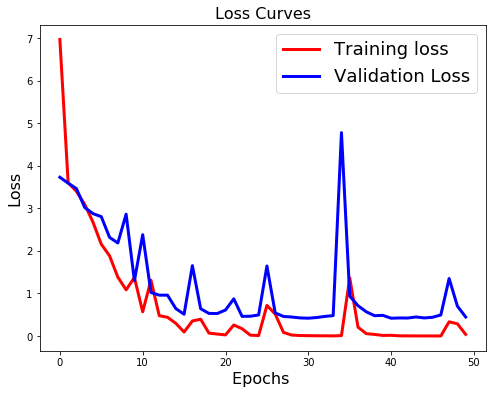

In [15]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5,1,'Accuracy Curves')

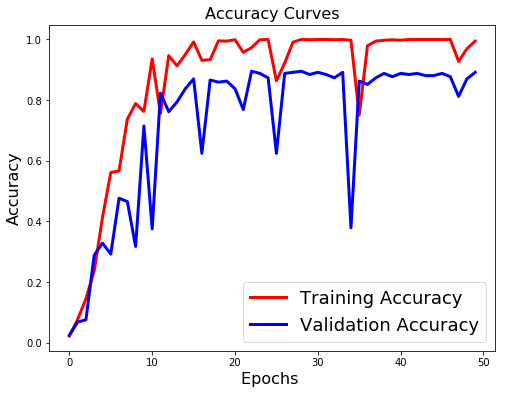

In [16]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [20]:
Y_pred=model1.predict(X_test)
#print (Y_pred)
y_pred=np.argmax(Y_pred,axis=1)
print(y_pred)

[21 25 33 30 28 31 19 26 20  2 24 13 25  5  9 16 36 24 31 37 22 29 34  0 26
 28  0 12 14  4 12 10  6 17 28 35  6  3 34 32 27 23 20  4 11 13  6 28  7 20
 13 16 36 18 31 18 29  1 29 19 11 25 14 24 18 16 36 31 24 22  8 35 36  5 18
 19 10 29 35 36 26 13 13  6 12 37  9  5 28 23  7 10 14  0 11 21 30 16 25 27
 34 27 36 13 30 32 27  4 33  0 11 24 32 31  3  7 12 21 21  0 36 37 20 16  9
 36 34 25 30 16 32 18 28 19  6 35 36  4  2  3  8 19 30 33 15 28 11 10 17 23
 37 11 32 33 26 35 36  1 20 14 36 29 36 18  1  0 30 20 17  1 31 17 33 19 17
 33 30 36  3 29 22 17 14  3  9 23 13 26 35 15 31 23  5 33 25 10 24  0 15 27
 20 32 31  5  9 32 11 17 22 24  1 23 16 12 23 27 14  6  3 15 33 29 34 26 30
  0 33  1 35 32  1 32 11 18 30  9 32 25  4 11 22  3 14 21 20 23 33 25  3  7
  6 18  9 18 32  6 10  6  4 26 15  1 25 20 36 24 15  9 18  0 31  6 36 35 33
 21 29  6 12 21  9 16 19 31 22  6  3 31 11  1  3 19  8 27  2 31 25  7 33 33
 33 26 35 11  2 18  5 32  5  7 23  0  1  6 18 23 10  8 23 13 35 12  1 33  6
 17 36 32 21

In [21]:
#This does the same as above
ypred1=model1.predict_classes(X_test)
print(ypred1)

[21 25 33 30 28 31 19 26 20  2 24 13 25  5  9 16 36 24 31 37 22 29 34  0 26
 28  0 12 14  4 12 10  6 17 28 35  6  3 34 32 27 23 20  4 11 13  6 28  7 20
 13 16 36 18 31 18 29  1 29 19 11 25 14 24 18 16 36 31 24 22  8 35 36  5 18
 19 10 29 35 36 26 13 13  6 12 37  9  5 28 23  7 10 14  0 11 21 30 16 25 27
 34 27 36 13 30 32 27  4 33  0 11 24 32 31  3  7 12 21 21  0 36 37 20 16  9
 36 34 25 30 16 32 18 28 19  6 35 36  4  2  3  8 19 30 33 15 28 11 10 17 23
 37 11 32 33 26 35 36  1 20 14 36 29 36 18  1  0 30 20 17  1 31 17 33 19 17
 33 30 36  3 29 22 17 14  3  9 23 13 26 35 15 31 23  5 33 25 10 24  0 15 27
 20 32 31  5  9 32 11 17 22 24  1 23 16 12 23 27 14  6  3 15 33 29 34 26 30
  0 33  1 35 32  1 32 11 18 30  9 32 25  4 11 22  3 14 21 20 23 33 25  3  7
  6 18  9 18 32  6 10  6  4 26 15  1 25 20 36 24 15  9 18  0 31  6 36 35 33
 21 29  6 12 21  9 16 19 31 22  6  3 31 11  1  3 19  8 27  2 31 25  7 33 33
 33 26 35 11  2 18  5 32  5  7 23  0  1  6 18 23 10  8 23 13 35 12  1 33  6
 17 36 32 21

In [26]:
print (np.argmax(y_test, axis=1))

[21 25 33 30 10 31 19 26 20  2 24 13 25  5  9 16 36 24 34 37 22 29 34  0 26
 28  0 12 25  4 12 10  6 17 24 35  6 12 34 32 27 23 20  4 11 13  6 28 23 20
 13 16 36 18 31 18 29  1 29 19 11 25 28 24 18 16 36 32 24 22  8 35 36  5 18
 19 10 29 35 36 26 13 13  6 12 37  9 34 28 23  7 10 14  0 11 21 30 16 25  5
 34 27 36 13 30 32 27  4  8  0 11 11 32 34  3  7 12 34 21  0 36 37 20 16  9
 36 34 25 30 16 32 18 28 19  6 35 36  4  2  3  8 19 30 33 16 28 11 10 17 23
 37 11 32 33 26 35 36  1 20 14 36 29 36 18 34  0 30 20 17  1 31 17 33 19 17
 33 30 16  3 29 22 17 26  3 24 23 13 26 35 15 31 23  5 33 25 10 24 14 15 27
 20 32 11  5  9 32 11 17 22 24  1 23 16 12 23 27 14  6 12 15 33 29 34 26 30
 14 33 32 35 32  1 32 11 18 30  9 32 25  4 22 22  3 14 21 20 17 33 25  3  7
  6 28  9 18 32  6 10  6  4 26 15 35 25 20 20 24 15  9 18  0 31  6 36 35 33
 21 29  6 12 21  9 16 19 32 22  6  3 31 11  1  3 19  8 27  2 31 25 22 33 33
 33 26 35 11  2 26  5 32  5  7 19  0 30  6 18 23 10  8 23 13 35 12  1 33  6
 17 36 32 21

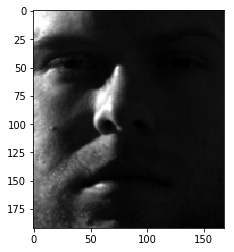

In [33]:
%matplotlib inline
plt.imshow(X[27].reshape((192,168)), cmap="gray")


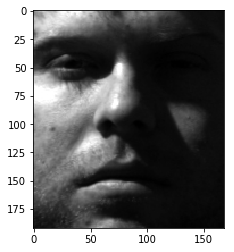

In [29]:
plt.imshow(X[23].reshape((192,168)), cmap="gray")

In [30]:
from sklearn.metrics import confusion_matrix


[[ 8  0  0 ...,  0  0  0]
 [ 0  8  0 ...,  0  0  0]
 [ 0  0  4 ...,  0  0  0]
 ..., 
 [ 0  1  0 ..., 11  0  0]
 [ 0  0  0 ...,  0 15  0]
 [ 0  0  0 ...,  0  0  5]]


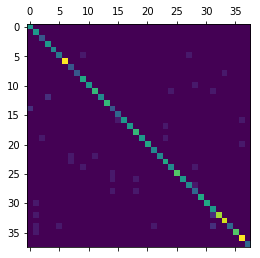

In [32]:
%matplotlib inline
import itertools
import matplotlib.pyplot as plt 
cmat= confusion_matrix(np.argmax(y_test, axis=1), y_pred)
print (cmat)
plt.matshow(cmat)

In [36]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(np.argmax(y_test, axis=1), y_pred)
print (accuracy)

0.893371757925
